In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr  3 01:48:01 2023

@author: FABAYO OLUWATOLA SILAS
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data from the csv file


def read_data(a, b):
    """
    Reads and imports files from comma seperated values, to a python DataFrame

    Arguments:
    a: string, The name of the csv file which is to be read
    b: integer, indicates the number of rows on the csv file to be
    skipped

    Returns:
    data: A pandas dataframe with all values from the excel file
    data_t: The transposed pandas dataframe
    """
    data = pd.read_csv(a, skiprows=b)
    data = data.drop(['Country Code', 'Indicator Code'], axis=1)
    transposed_data = data.set_index(
        data['Country Name']).T.reset_index().rename(columns={'index': 'Year'})
    transposed_data = transposed_data.set_index('Year').dropna(axis=1)
    transposed_data = transposed_data.drop(['Country Name'])
    return data, transposed_data

In [2]:
a = 'API_19_DS2_en_csv_v2_5336371.csv'
b = 4

data, transposed_data = read_data(a, b)

In [3]:
# Slicing the dataframe to get data for the indicators of interest


def indicator_set(c, d, e, f, g, h):
    """
    Reads and selects precise indicators from world bank dataframe,
    to a python DataFrame

    Arguments:
    c - h: 6 selected indicators from the dataset

    Returns:
    ind: A pandas dataframe with specific indicators selected
    """
    ind = data[data['Indicator Name'].isin([c, d, e, f, g, h])]

    return ind


c = 'CO2 emissions (kt)'
d = 'Electricity production from nuclear sources (% of total)'
e = 'Urban population (% of total population)'
f = 'Access to electricity (% of population)'
g = 'Renewable energy consumption (% of total final energy consumption)'
h = 'Electric power consumption (kWh per capita)'

ind = indicator_set(c, d, e, f, g, h)

In [4]:
# Slicing the dataframe to get data for the countries of interest


def country_set(countries):
    """
    Reads and selects country of interest from world bank dataframe,
    to a python DataFrame

    Arguments:
    countries: A list of countries selected from the dataframe
    Returns:
    specific_count: A pandas dataframe with specific countries selected
    """
    specific_count = ind[ind['Country Name'].isin(countries)]
    specific_count = specific_count.dropna(axis=1)
    specific_count = specific_count.reset_index(drop=True)
    return specific_count


# Selecting the countries specifically
countries = ['Qatar', 'China', 'Canada', 'New Zealand',
             'Russian Federation', 'Italy', 'United States', 'United Kingdom']

specific_count = country_set(countries)

In [5]:
# STATISTICS OF THE DATA
stats_desc = specific_count.groupby(["Country Name", "Indicator Name"])
print(stats_desc.describe())


def skew(dist):
    """ Calculates the centralised and normalised skewness of dist. """

    # calculates average and std, dev for centralising and normalising
    aver = np.mean(dist)
    std = np.std(dist)

    # now calculate the skewness
    value = np.sum(((dist-aver) / std)**3) / len(dist-1)

    return value


def kurtosis(dist):
    """ Calculates the centralised and normalised excess kurtosis of dist. """

    # calculates average and std, dev for centralising and normalising
    aver = np.mean(dist)
    std = np.std(dist)

    # now calculate the kurtosis
    value = np.sum(((dist-aver) / std)**4) / len(dist-1) - 3.0

    return value

                                                                       2000  \
                                                                      count   
Country Name       Indicator Name                                             
Canada             Access to electricity (% of population)              1.0   
                   CO2 emissions (kt)                                   1.0   
                   Electric power consumption (kWh per capita)          1.0   
                   Electricity production from nuclear sources (% ...   1.0   
                   Renewable energy consumption (% of total final ...   1.0   
                   Urban population (% of total population)             1.0   
China              Access to electricity (% of population)              1.0   
                   CO2 emissions (kt)                                   1.0   
                   Electric power consumption (kWh per capita)          1.0   
                   Electricity production from nucle

In [6]:
def grp_countries_ind(indicator):
    """
    Selects and groups countries based on the specific indicators,
    to a python DataFrame

    Arguments:
    indicator: Choosing the indicator

    Returns:
    grp_ind_con: A pandas dataframe with specific countries selected
    """
    grp_ind_con = specific_count[specific_count["Indicator Name"] == indicator]
    grp_ind_con = grp_ind_con.set_index('Country Name', drop=True)
    grp_ind_con = grp_ind_con.transpose().drop('Indicator Name')
    grp_ind_con[countries] = grp_ind_con[countries].apply(
        pd.to_numeric, errors='coerce', axis=1)
    return grp_ind_con

In [7]:
# Giving each indicator a dataframe
CO2_emission = grp_countries_ind("CO2 emissions (kt)")
elec_prod = grp_countries_ind(
    "Electricity production from nuclear sources (% of total)")
urban_pop = grp_countries_ind("Urban population (% of total population)")
elec_access = grp_countries_ind("Access to electricity (% of population)")
ren_ene = grp_countries_ind(
    "Renewable energy consumption (% of total final energy consumption)")
ene_use = grp_countries_ind("Electric power consumption (kWh per capita)")

print(skew(CO2_emission))
print(kurtosis(CO2_emission))

Country Name
Canada               -0.314484
China                -0.057946
United Kingdom       -0.653520
Italy                -0.747334
New Zealand          -0.105167
Qatar                 0.364513
Russian Federation    0.066643
United States        -0.515593
dtype: float64
Country Name
Canada               -0.549373
China                -1.349064
United Kingdom       -1.016527
Italy                -0.574247
New Zealand          -0.839452
Qatar                -1.208672
Russian Federation   -0.943446
United States        -1.369622
dtype: float64


C:\Users\Vite UH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


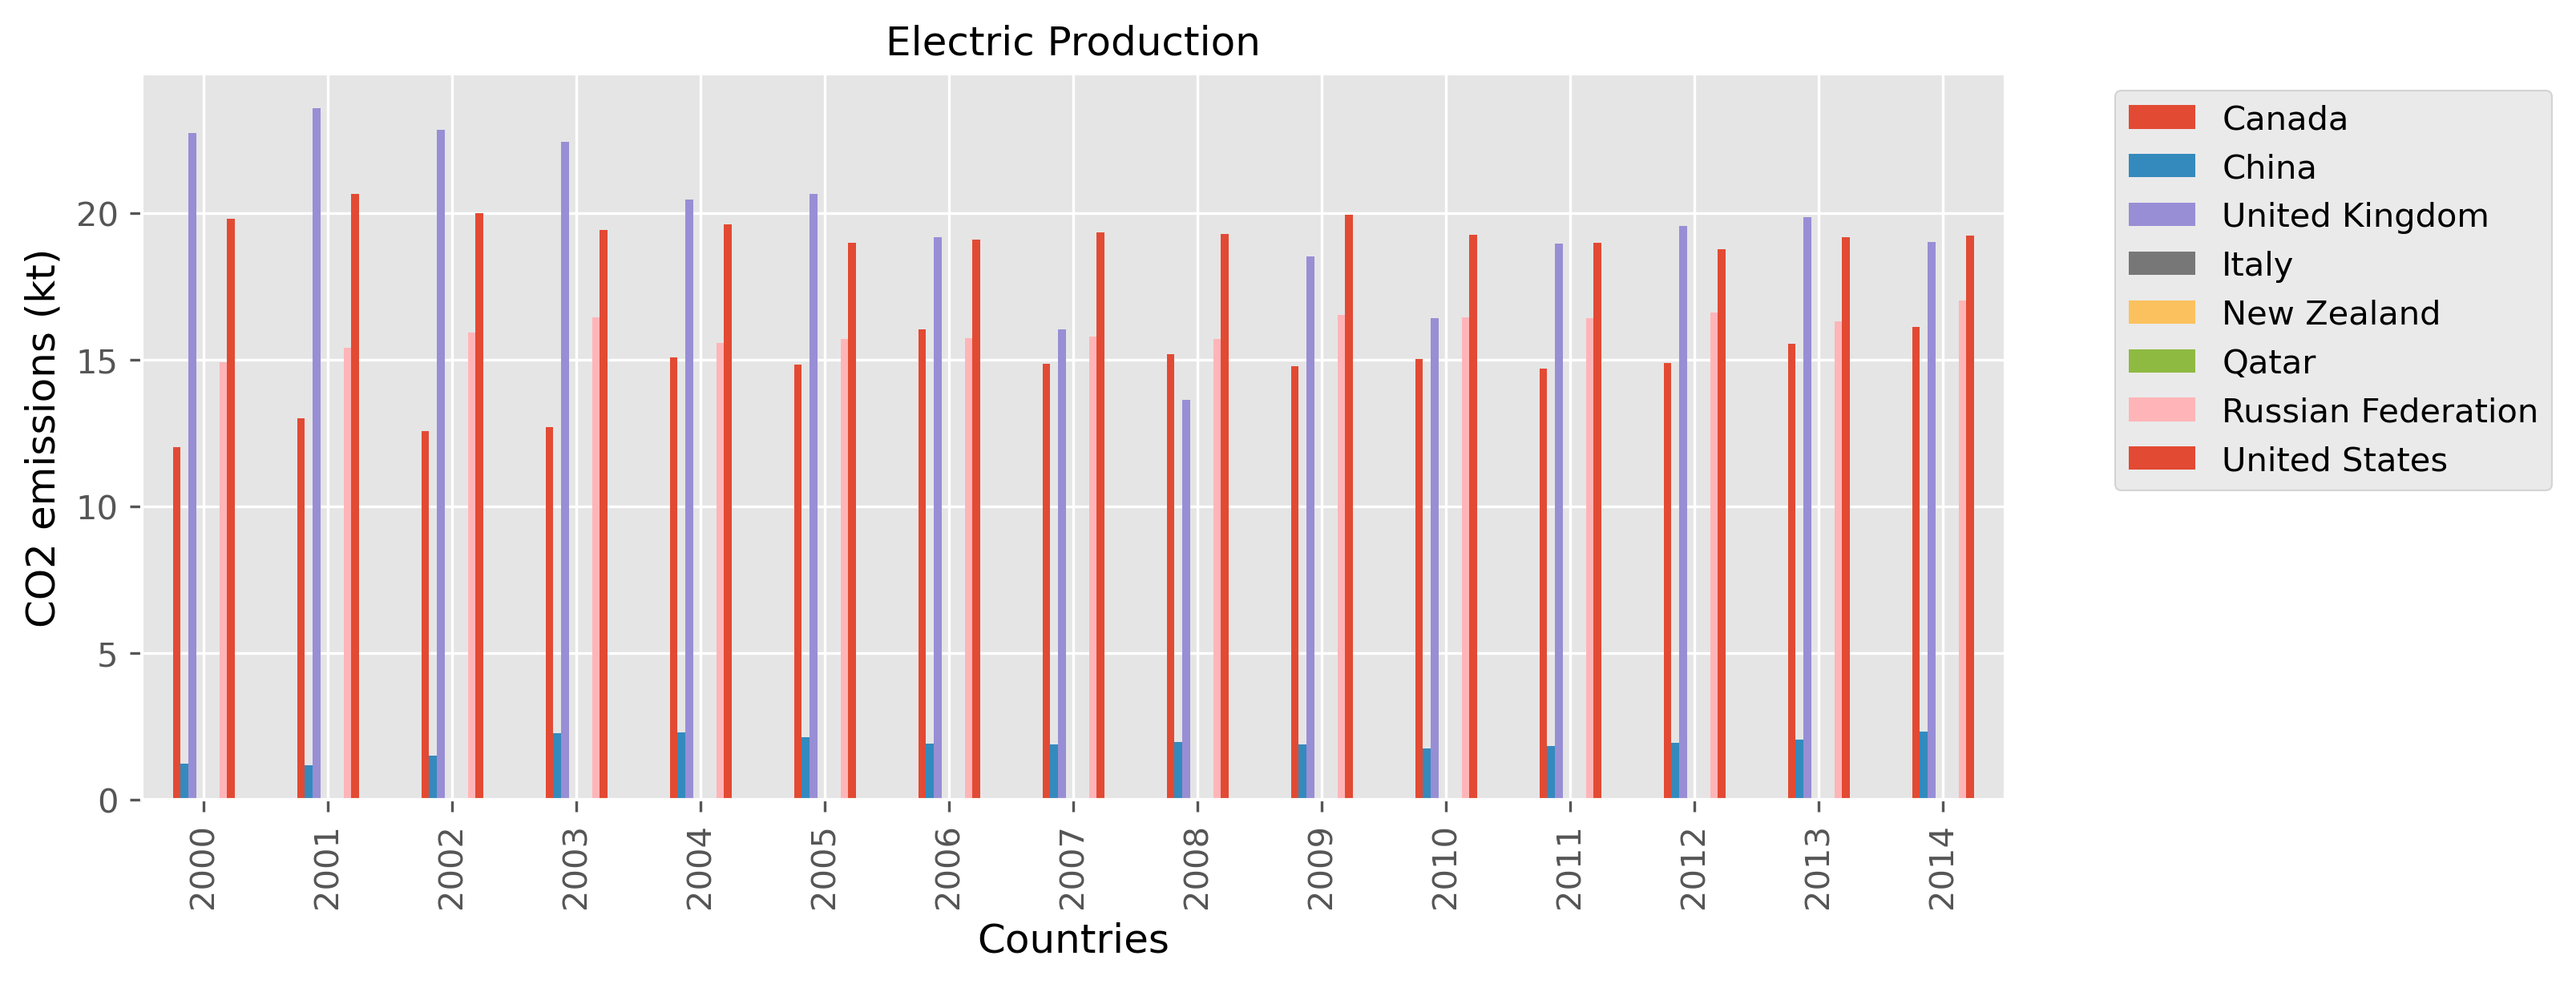

In [9]:
elec_prod.plot(kind='bar',figsize=[10,4])
plt.style.use('ggplot')
plt.title('Electric Production', fontsize = 12, c='k')
plt.xlabel('Countries', c ='k')
plt.ylabel('CO2 emissions (kt)', c ='k')
plt.rcParams["figure.dpi"] = 300
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

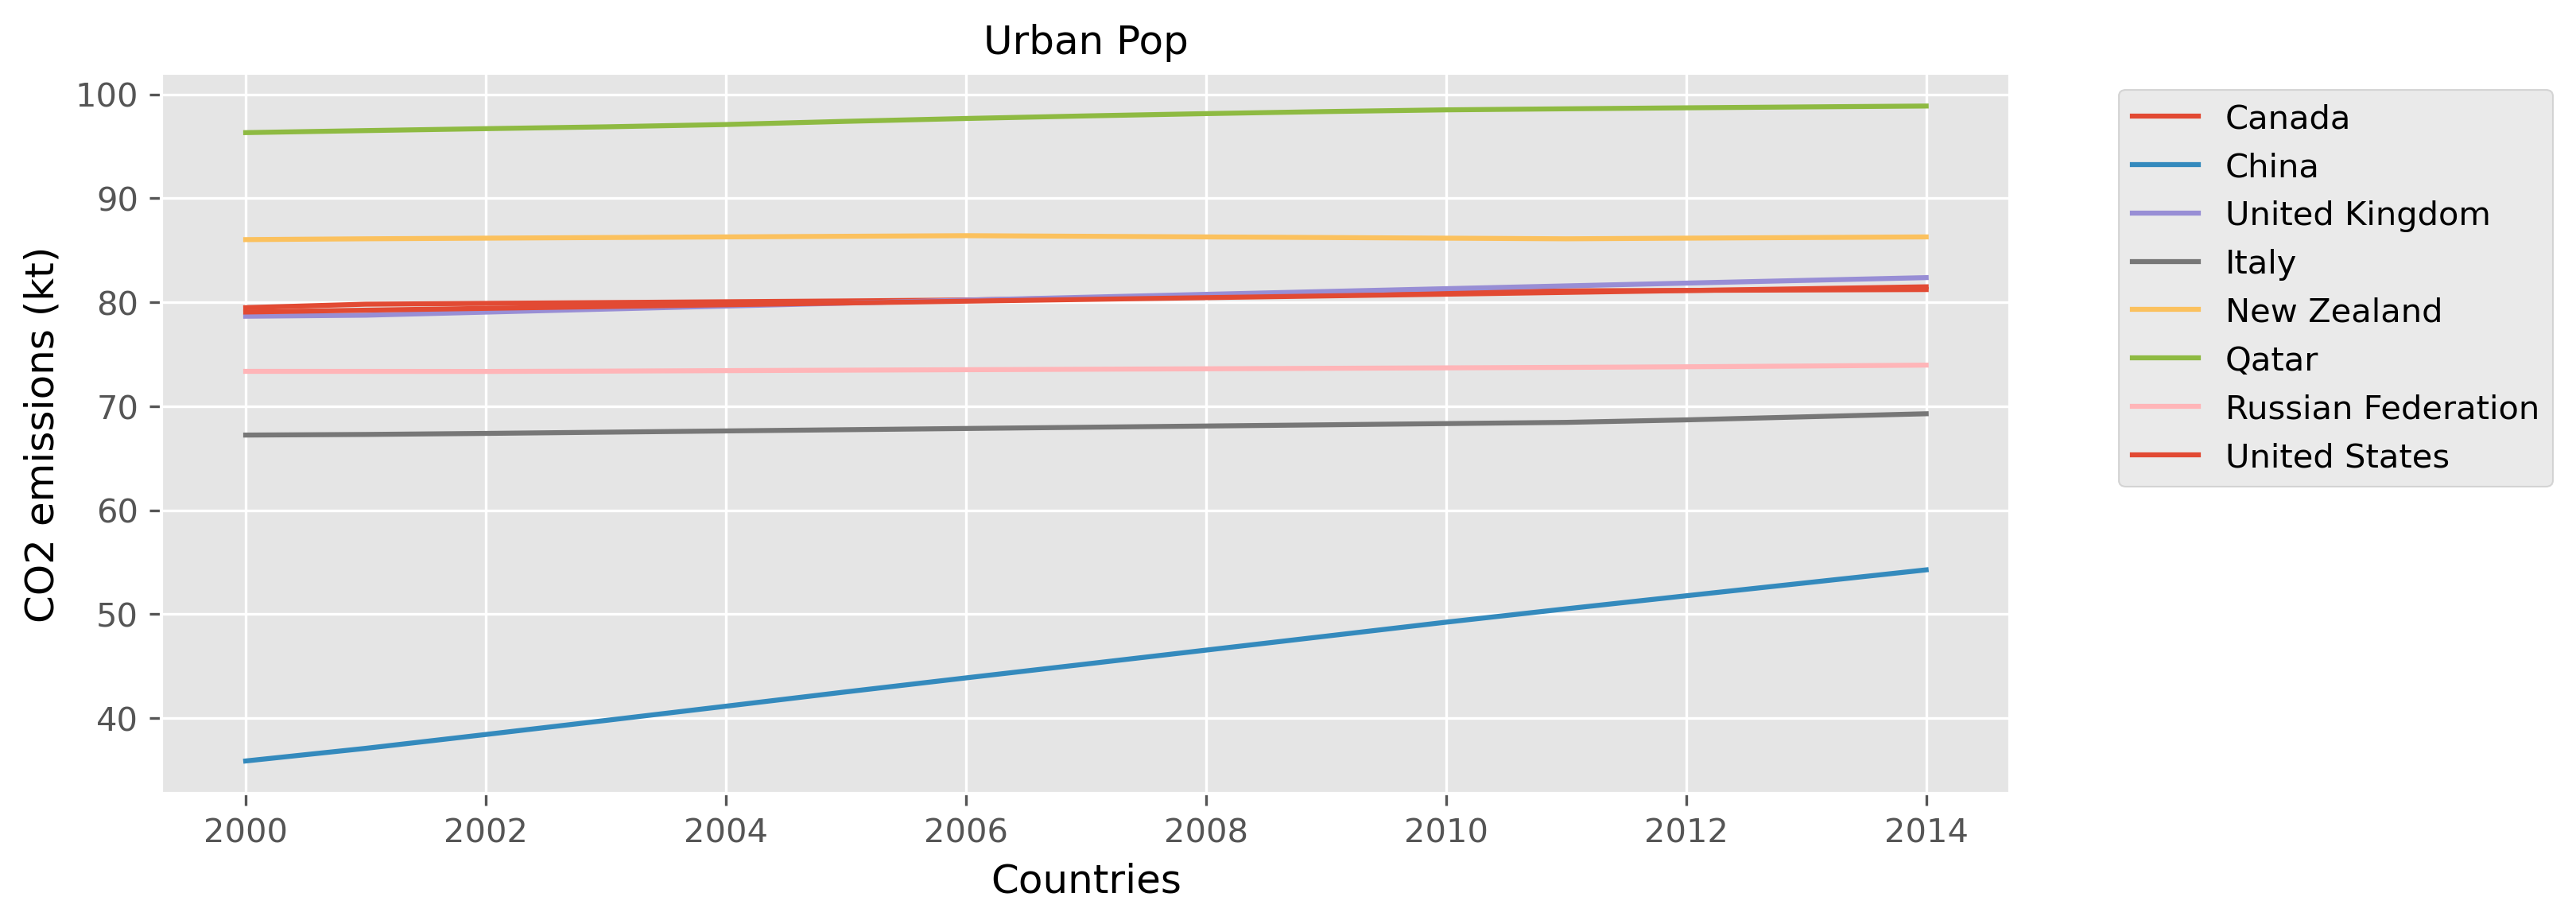

In [12]:
urban_pop.plot(figsize=[10,4])
plt.style.use('ggplot')
plt.title('Urban Pop', fontsize = 12, c='k')
plt.xlabel('Countries', c ='k')
plt.ylabel('CO2 emissions (kt)', c ='k')
plt.rcParams["figure.dpi"] = 300
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

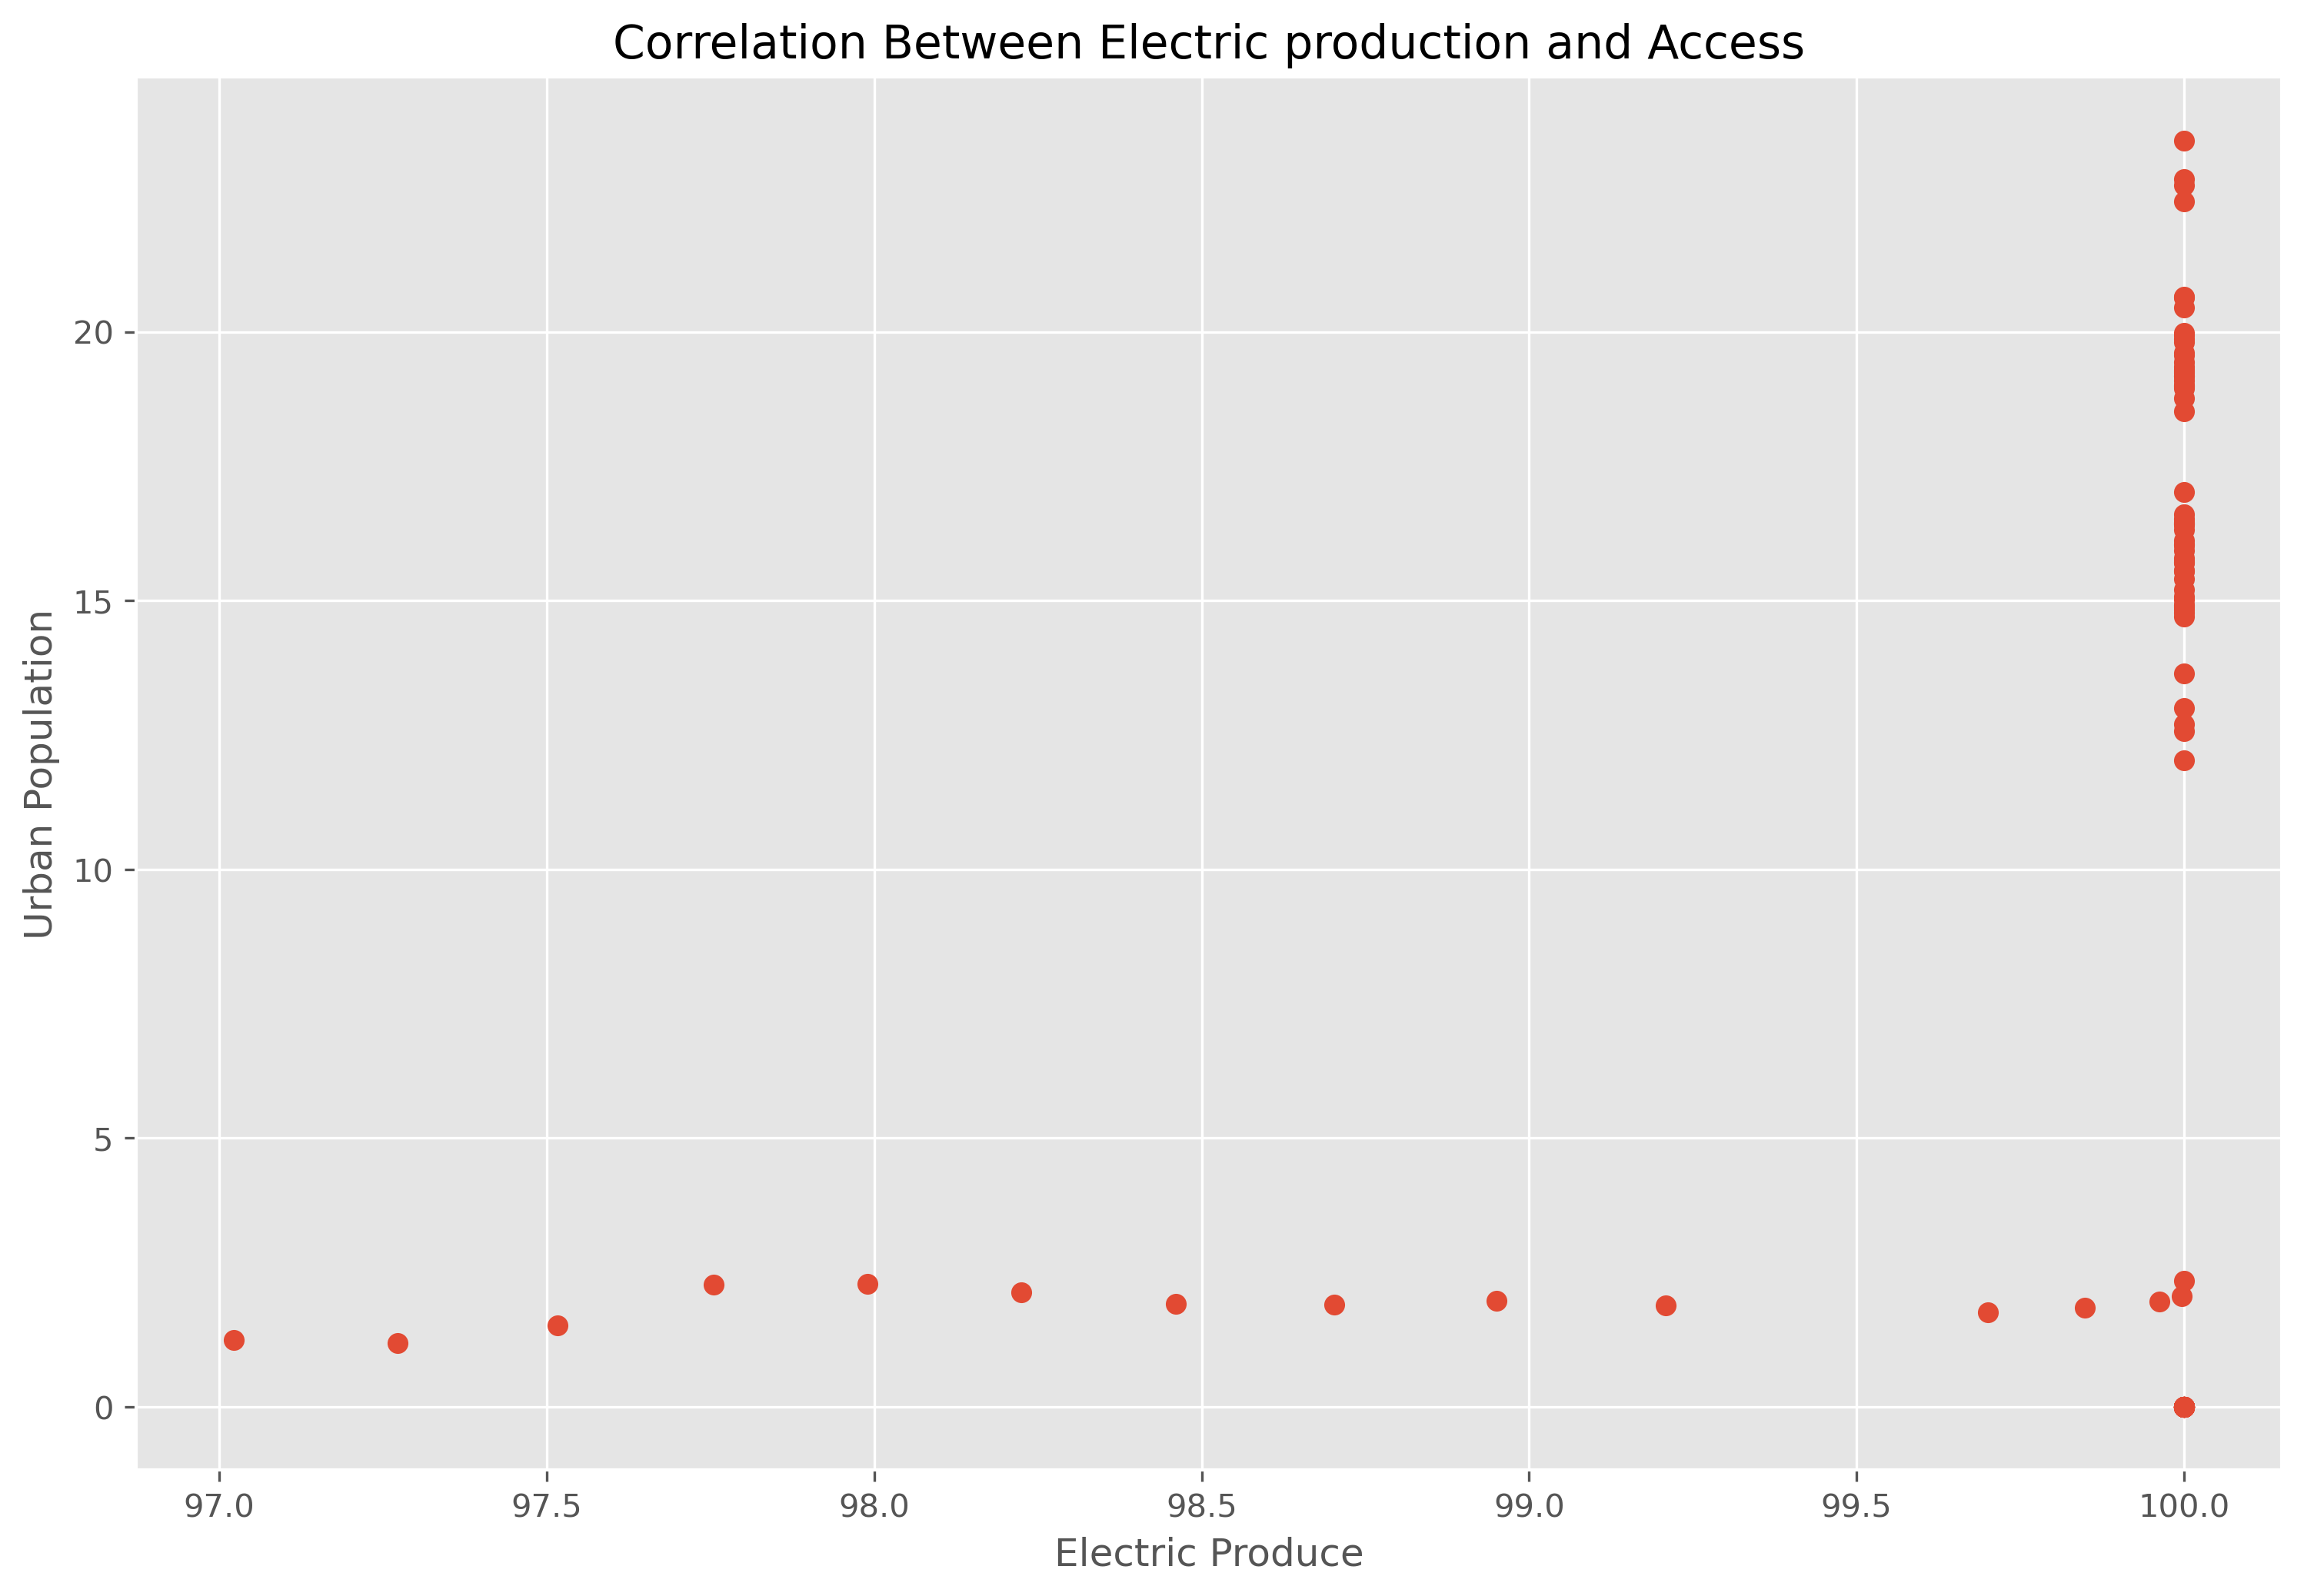

In [15]:
plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(elec_access, elec_prod)

# Create a title and axis labels
plt.title("Correlation Between Electric production and Access")
plt.xlabel("Electric Produce")
plt.ylabel("Urban Population")

# Show the plot
plt.show()